In [8]:
!pip install scikit-image

In [9]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

In [5]:

def heart_3d(x,y,z):
   return (x**2+(9/4)*y**2+z**2-1)**3-x**2*z**3-(9/80)*y**2*z**3


def plot_implicit(fn, bbox=(-1.5, 1.5)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    A = np.linspace(xmin, xmax, 100) # resolution of the contour
    B = np.linspace(xmin, xmax, 40) # number of slices
    A1, A2 = np.meshgrid(A, A) # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X, Y = A1, A2
        Z = fn(X, Y, z)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z', colors=('r',))
        # [z] defines the only level to plot
        # for this contour for this value of z

    for y in B:  # plot contours in the XZ plane
        X, Z = A1, A2
        Y = fn(X, y, Z)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y', colors=('red',))

    for x in B: # plot contours in the YZ plane
        Y, Z = A1, A2
        X = fn(x, Y, Z)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x',colors=('red',))

    # must set plot limits because the contour will likely extend
    # way beyond the displayed level.  Otherwise matplotlib extends the plot limits
    # to encompass all values in the contour.
    ax.set_zlim3d(zmin, zmax)
    ax.set_xlim3d(xmin, xmax)
    ax.set_ylim3d(ymin, ymax)

    plt.show()



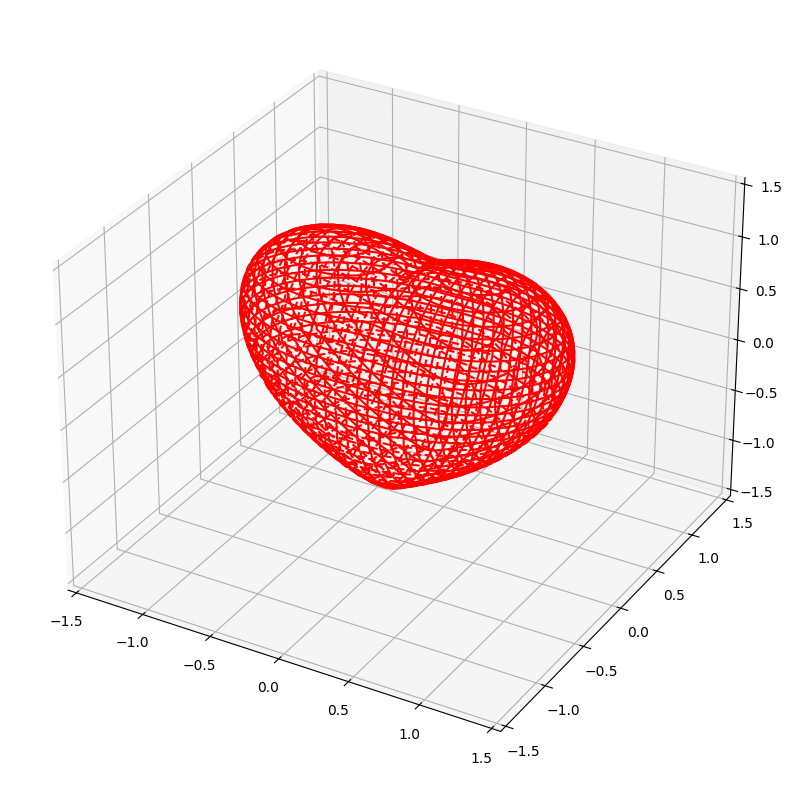

In [19]:
  plot_implicit(heart_3d)

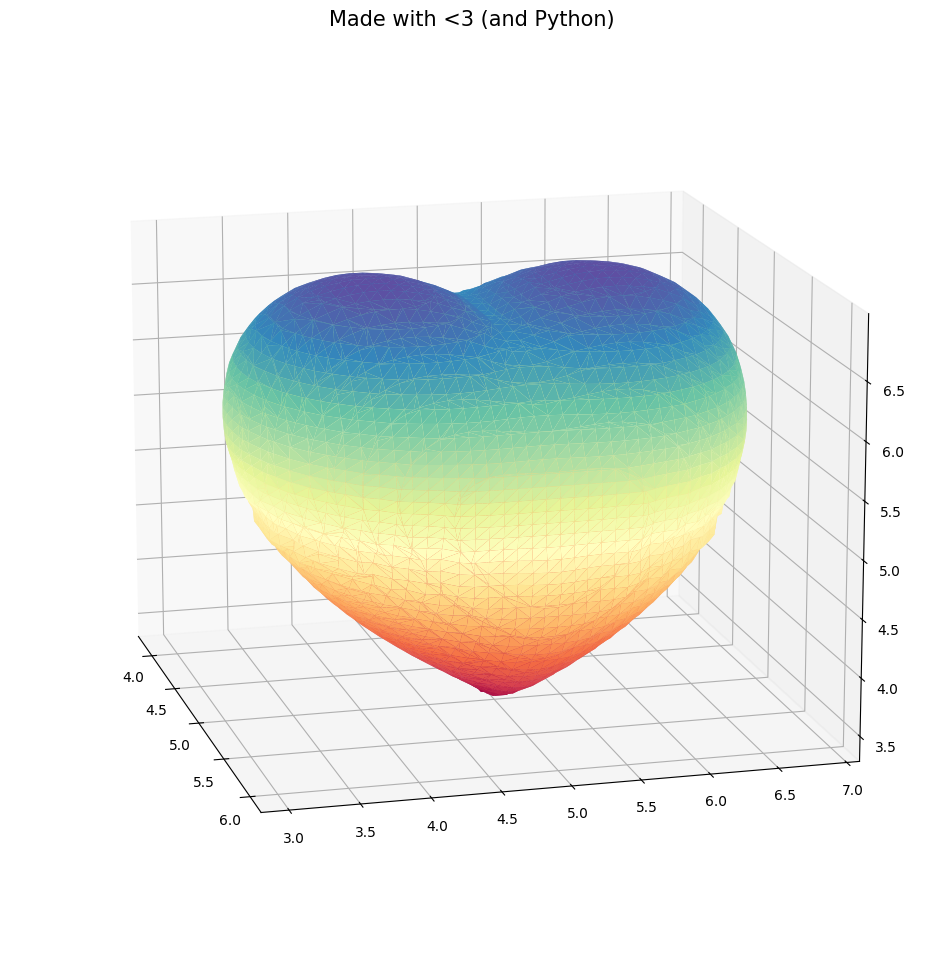

In [17]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import numpy as np
from skimage.measure import marching_cubes  # Correct import for newer versions

# Set up mesh
n = 100
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
z = np.linspace(-3, 3, n)
X, Y, Z = np.meshgrid(x, y, z)

# Create cardioid function
def f_heart(x, y, z):
    F = 320 * ((-x**2 * z**3 - 9*y**2 * z**3/80) +
               (x**2 + 9*y**2/4 + z**2 - 1)**3)
    return F

# Obtain values at every point in the mesh
vol = f_heart(X, Y, Z)

# Extract a 2D surface mesh from a 3D volume (F=0)
verts, faces, normals, values = marching_cubes(vol, level=0, spacing=(0.1, 0.1, 0.1))

# Create a 3D figure
fig = plt.figure(figsize=(12,12 ))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_trisurf(verts[:, 0], verts[:, 1], faces, verts[:, 2], cmap='Spectral', lw=1)

# Change the angle of view and title
ax.view_init(15, -15)
ax.set_title("Made with <3 (and Python)", fontsize=15)

# Show the plot
plt.show()
